## Summary notes

This was the initial **#TidyTuesday** project, posted back on 30th April, 2018.
Here is the motivating tweet from [@thomas_mock](https://twitter.com/thomas_mock)

<blockquote class="twitter-tweet"><p lang="en" dir="ltr">Welcome to <a href="https://twitter.com/hashtag/TidyTuesday?src=hash&amp;ref_src=twsrc%5Etfw">#TidyTuesday</a> week 5, let&#39;s explore the 2015 American Community Survey! <br><br>Data are 5 year average estimates at the county level from <a href="https://t.co/MB0WutGQLL">https://t.co/MB0WutGQLL</a> via kaggle<br><br>Data: <a href="https://t.co/sElb4fcv3u">https://t.co/sElb4fcv3u</a> <br>Source: <a href="https://t.co/4lhpdlcEcD">https://t.co/4lhpdlcEcD</a><a href="https://twitter.com/hashtag/rstats?src=hash&amp;ref_src=twsrc%5Etfw">#rstats</a> <a href="https://twitter.com/hashtag/tidyverse?src=hash&amp;ref_src=twsrc%5Etfw">#tidyverse</a> <a href="https://twitter.com/hashtag/r4ds?src=hash&amp;ref_src=twsrc%5Etfw">#r4ds</a> <a href="https://twitter.com/hashtag/dataviz?src=hash&amp;ref_src=twsrc%5Etfw">#dataviz</a> <a href="https://t.co/5zAtlMBiq0">pic.twitter.com/5zAtlMBiq0</a></p>&mdash; Tom Mock (@thomas_mock) <a href="https://twitter.com/thomas_mock/status/990932756921225218?ref_src=twsrc%5Etfw">April 30, 2018</a></blockquote> <script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>

We followed [@thomas_mock](https://twitter.com/thomas_mock)'s' advice and plotted a selected set of graphs that would be useful in an exploratory data analysis (EDA).

Source data was taken from [census.gov](https://www.census.gov/) (via [kaggle.com](kaggle.com)).

The data was tidy.
The column titles were in `PascalCase`, so we transformed them to `snake_case`.
A new multi-index was constructed from the unique identifiers, `(state, county, census_id,)`.
Any missing values were replaced with the column mean.

The data was further processed to find the percentage of the population that were women, and the income per captita ($000).
The change to the income per capita was done to reduce its range, so all four selected variables shared approximately the same range.
Given the size of the data, we selected a subset of the variables to explore.
These were:

- women (%age of population)
- poverty
- public work
- income per cap ($000)

We sampled the data (*n* = 1250) to get around Altair's max row limit for in-notebook DataFrames.
A standardised view of the data was also created for the correlation and covariance heatmaps.
(See the `standardise` function.)

Four visualisations were produced:
The first shows a **multiple boxplot**;
second is a **matrix scatterplot**;
and third and fourth are **heatmaps** of the correlation and covariance matrices (of the standardised data.)

## Dependencies

In [1]:
import numpy as np
import pandas as pd
import altair as alt
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
sns.set_theme()

## Constants

In [3]:
#| code-fold: false
ACS_URL = ('https://raw.githubusercontent.com/rfordatascience/tidytuesday/'
           + 'master/data/2018/2018-04-30/week5_acs2015_county_data.csv')

## Functions

In [4]:
#| code-fold: false
def pascal_to_snake_case(s: str) -> str:
    return ''.join(['_' + c.lower() if c.isupper() else c for c in s])[1:]

In [5]:
#| code-fold: false
def standardise(df: pd.DataFrame) -> pd.DataFrame:
    """@pipeline.
    Standardise the dataframe.
    """
    df = df.transform(lambda x: (x - x.mean()) / x.std())
    return df

## Main

### Load the data

In [6]:
acs = pd.read_csv(ACS_URL, encoding='latin-1')
acs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3220 entries, 0 to 3219
Data columns (total 37 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CensusId         3220 non-null   int64  
 1   State            3220 non-null   object 
 2   County           3220 non-null   object 
 3   TotalPop         3220 non-null   int64  
 4   Men              3220 non-null   int64  
 5   Women            3220 non-null   int64  
 6   Hispanic         3220 non-null   float64
 7   White            3220 non-null   float64
 8   Black            3220 non-null   float64
 9   Native           3220 non-null   float64
 10  Asian            3220 non-null   float64
 11  Pacific          3220 non-null   float64
 12  Citizen          3220 non-null   int64  
 13  Income           3219 non-null   float64
 14  IncomeErr        3219 non-null   float64
 15  IncomePerCap     3220 non-null   int64  
 16  IncomePerCapErr  3220 non-null   int64  
 17  Poverty       

### Prepare the data

Take a view of the data, add the proportion of the population that are female and recale the income per capita.

In [7]:
v_acs = acs
v_acs['PropWomen'] = (
    v_acs['Women']
    .div(v_acs[['Men', 'Women']].sum(axis=1))
    .mul(100)
    .round(3)
)
v_acs['IncomePerCap_000'] = v_acs['IncomePerCap'].div(1000)

Sample the data.

In [8]:
v_sample = (
    v_acs
    .get(['IncomePerCap_000', 'PropWomen', 'Poverty', 'PublicWork'])
    .sample(n=1250, random_state=20180430)
)

### Visualise the data

Plot multiple boxplots of the sampled data.

In [9]:
alt.Chart(v_sample.melt()).mark_boxplot(size=50).encode(
    x='variable',
    y='value',
    color=alt.Color('variable', legend=None)
).properties(
    height=600,
    width=800,
    title='Multiple boxplots of the sampled ACS data'
)

alt.Chart(...)

Plot a matrix scatterplot of the sampled data.

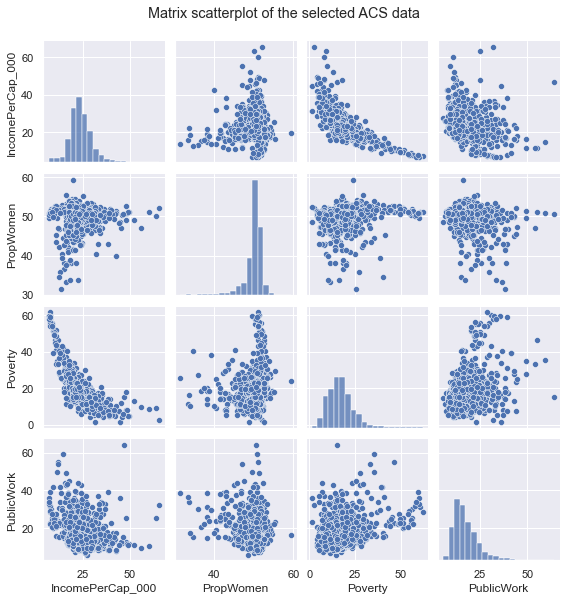

In [10]:
_g = sns.pairplot(
    v_sample,
    diag_kws={'bins': 20},
    height=2,
)
_g.fig.suptitle('Matrix scatterplot of the selected ACS data', y= 1.04)
plt.show()

Plot a heatmap of the correlation matrix.

In [11]:
#| code-summary: 'Plot a heatmap the correlation matrix'
_gsource = (
    v_sample
    .transform(standardise)
    .corr()
    .reset_index(drop=False)
    .rename(columns={'index': 'X1'})
    .melt(id_vars='X1', var_name='X2', value_name='r')
    .round(2)
)

_base = alt.Chart(_gsource).encode(
    x='X1',
    y='X2'
)

_heatmap = _base.mark_rect().encode(
    color=alt.Color(
                "r",
                scale=alt.Scale(scheme="turbo", domain=np.linspace(-1, 1)))
)

_text = _base.mark_text(baseline='middle', size=14).encode(
    text='r',
    color=alt.condition(
        abs(alt.datum.r) > 0.5,
        alt.value('white'),
        alt.value('black')
    )
)

(_heatmap + _text).properties(
    title='Correlation heatmap',
    width=600,
    height=600,
)

alt.LayerChart(...)

Plot a heatmap of the covariance matrix.

In [12]:
#| code-summary: 'Plot a heatmap of the covariance matrix'
_gsource = (
    v_sample
    .transform(standardise)
    .cov()
    .reset_index(drop=False)
    .rename(columns={'index': 'X1'})
    .melt(id_vars='X1', var_name='X2', value_name='cov')
    .round(2)
)

_base = alt.Chart(_gsource).encode(
    x='X1',
    y='X2'
)

_heatmap = _base.mark_rect().encode(
    color=alt.Color(
        "cov",
        scale=alt.Scale(
            scheme="turbo",
            domain=np.linspace(-1, 1)
        )
    )
)

_text = _base.mark_text(baseline='middle', size=14).encode(
    text='cov',
    color=alt.condition(
        abs(alt.datum.cov) > 0.5,
        alt.value('white'),
        alt.value('black')
    )
)

(_heatmap + _text).properties(
    title='Covariance heatmap',
    width=600,
    height=600,
)

alt.LayerChart(...)